In [1]:
!nvidia-smi

Wed Aug 17 02:02:51 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 516.94       Driver Version: 516.94       CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   51C    P8     5W /  N/A |      0MiB /  4096MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install einops
import torch
torch.cuda.is_available()

True

In [3]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

In [4]:
'''
#Checking if photos are readable for PIL
from PIL import Image 
with os.scandir("./Dataset/Dataset_Y/") as tarama:
    for belge in tarama:
      with os.scandir("./Dataset/Dataset_Y/" + str(belge.name)) as tarama2:
        for belge2 in tarama2:
          with os.scandir("./Dataset/Dataset_Y/" + str(belge.name) + '/' + str(belge2.name)) as tarama3:
            for belge3 in tarama3:
              try:
                Image.open("./Dataset/Dataset_Y/" + str(belge.name) + '/' + str(belge2.name)+ '/' + str(belge3.name))
              except:
                os.remove("./Dataset/Dataset_Y/" + str(belge.name) + '/' + str(belge2.name)+ '/' + str(belge3.name))
                print('deleted')
print('finish')
            
'''

'\n#Checking if photos are readable for PIL\nfrom PIL import Image \nwith os.scandir("./Dataset/Dataset_Y/") as tarama:\n    for belge in tarama:\n      with os.scandir("./Dataset/Dataset_Y/" + str(belge.name)) as tarama2:\n        for belge2 in tarama2:\n          with os.scandir("./Dataset/Dataset_Y/" + str(belge.name) + \'/\' + str(belge2.name)) as tarama3:\n            for belge3 in tarama3:\n              try:\n                Image.open("./Dataset/Dataset_Y/" + str(belge.name) + \'/\' + str(belge2.name)+ \'/\' + str(belge3.name))\n              except:\n                os.remove("./Dataset/Dataset_Y/" + str(belge.name) + \'/\' + str(belge2.name)+ \'/\' + str(belge3.name))\n                print(\'deleted\')\nprint(\'finish\')\n            \n'

In [5]:
#Labels creating I think you already prepared the label dict
Labels = {}
i = 0
with os.scandir("./Dataset/Dataset_Y/") as tarama:
    for belge in tarama:
      with os.scandir("./Dataset/Dataset_Y/" + str(belge.name)) as tarama2:
        for belge2 in tarama2:
          Labels[belge.name + '/' + belge2.name] = i
          i +=1

# for better looks sort dict and copy past all prints to Label section in dataset loaader part
sorted_labels = sorted(Labels.items(), key= lambda x:x[1])
for i in sorted_labels:
  print("'"+ i[0] + "': " + str(i[1])+ ",")
  

'Audi/A1': 0,
'Audi/A3': 1,
'Audi/A4': 2,
'Audi/A4 Allroad Quattro': 3,
'Audi/A5': 4,
'Audi/A6': 5,
'Audi/A7': 6,
'Audi/A8': 7,
'Audi/Q2': 8,
'Audi/Q3': 9,
'Audi/Q3 Sportback': 10,
'Audi/Q5': 11,
'Audi/Q7': 12,
'Audi/S3': 13,
'BMW/1 Serisi': 14,
'BMW/2 Serisi': 15,
'BMW/3 Serisi': 16,
'BMW/4 Serisi': 17,
'BMW/5 Serisi': 18,
'BMW/SERIES 1': 19,
'BMW/X1': 20,
'BMW/X2': 21,
'BMW/X3': 22,
'BMW/X5': 23,
'Chevrolet/Aveo': 24,
'Chevrolet/Captiva': 25,
'Chevrolet/Cruze': 26,
'Citroen/Berlingo': 27,
'Citroen/C-ELYSEE': 28,
'Citroen/C3': 29,
'Citroen/C4': 30,
'Citroen/C5 Aircross': 31,
'Citroen/DS 7 CROSSBACK': 32,
'Dacia/Duster': 33,
'Dacia/Lodgy': 34,
'Dacia/Sandero': 35,
'Fiat/500L': 36,
'Fiat/Doblo': 37,
'Fiat/Egea': 38,
'Fiat/Fiorino': 39,
'Fiat/Linea': 40,
'Fiat/Punto': 41,
'Ford/Fiesta': 42,
'Ford/Focus': 43,
'Ford/Kuga': 44,
'Ford/Puma': 45,
'Ford/Tourneo Connect': 46,
'Ford/Tourneo Courier': 47,
'Ford/Tourneo Custom': 48,
'Honda/City': 49,
'Honda/Civic': 50,
'Honda/CR-V': 51,
'Hyundai/E

In [6]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

cudnn.benchmark = True
plt.ion()   # interactive mode

In [7]:
import torch.optim as optim
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.utils.data
import torch.utils.data.distributed
import torchvision.transforms as transforms
#from dataset.dataset import SeedlingData
from torch.autograd import Variable

In [8]:
# Set global parameters
modellr = 1e-4
BATCH_SIZE = 32 # we can drop it 8 if we encourage any ram eror 
EPOCHS = 20 #maybe 100
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [9]:
torch.device('cuda' if torch.cuda.is_available() else 'cpu')

device(type='cuda')

In [10]:
# Data preprocessing

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])

])
transform_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

In [11]:
import os
from PIL import Image
from torch.utils import data
from torchvision import transforms as T
from sklearn.model_selection import train_test_split

Labels = {'Audi/A1': 0,
'Audi/A3': 1,
'Audi/A4': 2,
'Audi/A4 Allroad Quattro': 3,
'Audi/A5': 4,
'Audi/A6': 5,
'Audi/A7': 6,
'Audi/A8': 7,
'Audi/Q2': 8,
'Audi/Q3': 9,
'Audi/Q3 Sportback': 10,
'Audi/Q5': 11,
'Audi/Q7': 12,
'Audi/S3': 13,
'BMW/1 Serisi': 14,
'BMW/2 Serisi': 15,
'BMW/3 Serisi': 16,
'BMW/4 Serisi': 17,
'BMW/5 Serisi': 18,
'BMW/SERIES 1': 19,
'BMW/X1': 20,
'BMW/X2': 21,
'BMW/X3': 22,
'BMW/X5': 23,
'Chevrolet/Aveo': 24,
'Chevrolet/Captiva': 25,
'Chevrolet/Cruze': 26,
'Citroen/Berlingo': 27,
'Citroen/C-ELYSEE': 28,
'Citroen/C3': 29,
'Citroen/C4': 30,
'Citroen/C5 Aircross': 31,
'Citroen/DS 7 CROSSBACK': 32,
'Dacia/Duster': 33,
'Dacia/Lodgy': 34,
'Dacia/Sandero': 35,
'Fiat/500L': 36,
'Fiat/Doblo': 37,
'Fiat/Egea': 38,
'Fiat/Fiorino': 39,
'Fiat/Linea': 40,
'Fiat/Punto': 41,
'Ford/Fiesta': 42,
'Ford/Focus': 43,
'Ford/Kuga': 44,
'Ford/Puma': 45,
'Ford/Tourneo Connect': 46,
'Ford/Tourneo Courier': 47,
'Ford/Tourneo Custom': 48,
'Honda/City': 49,
'Honda/Civic': 50,
'Honda/CR-V': 51,
'Hyundai/Elantra': 52,
'Hyundai/I10': 53,
'Hyundai/I20': 54,
'Hyundai/I30': 55,
'Hyundai/ix35': 56,
'Hyundai/Tucson': 57,
'Isuzu/D-MAX': 58,
'Jeep/Cherokee': 59,
'Jeep/Compass': 60,
'Jeep/Renegade': 61,
'KIA/Cerato': 62,
'KIA/Picanto': 63,
'KIA/Rio': 64,
'KIA/Sportage': 65,
'Land Over/Discovery Sport': 66,
'Land Over/Range Rover Evoque': 67,
'Land Over/Range Rover Sport': 68,
'Mazda/Mazda3': 69,
'Mercedes-Benz/190 E': 70,
'Mercedes-Benz/280': 71,
'Mercedes-Benz/A-Serisi': 72,
'Mercedes-Benz/AMG GT': 73,
'Mercedes-Benz/B-Serisi': 74,
'Mercedes-Benz/C-Serisi': 75,
'Mercedes-Benz/CLA-Serisi': 76,
'Mercedes-Benz/E-Serisi': 77,
'Mercedes-Benz/X-Class': 78,
'MINI/Cooper': 79,
'MINI/One': 80,
'Nissan/EX': 81,
'Nissan/Juke': 82,
'Nissan/Micra': 83,
'Nissan/Navara': 84,
'Nissan/Qashqai': 85,
'Opel/Astra': 86,
'Opel/Corsa': 87,
'Opel/Crossland X': 88,
'Opel/Grandland X': 89,
'Opel/Insignia': 90,
'Opel/Mokka': 91,
'Peugeot/2008': 92,
'Peugeot/208': 93,
'Peugeot/3008': 94,
'Peugeot/301': 95,
'Peugeot/308': 96,
'Peugeot/Partner': 97,
'Peugeot/Rifter': 98,
'Porsche/Macan': 99,
'Porsche/Panamera': 100,
'Porsche/Taycan': 101,
'Renault/Captur': 102,
'Renault/Clio': 103,
'Renault/Fluence': 104,
'Renault/Kadjar': 105,
'Renault/Megane': 106,
'Renault/Symbol': 107,
'Renault/Taliant': 108,
'Seat/Arona': 109,
'Seat/Ateca': 110,
'Seat/Ibiza': 111,
'Seat/Leon': 112,
'Seat/Toledo': 113,
'Toyota/Auris': 114,
'Toyota/C-HR': 115,
'Toyota/Corolla': 116,
'Toyota/Proace City': 117,
'Toyota/RAV4': 118,
'Toyota/Yaris': 119,
'Volkswagen/Amarok': 120,
'Volkswagen/Arteon': 121,
'Volkswagen/Beetle': 122,
'Volkswagen/Caddy': 123,
'Volkswagen/CC': 124,
'Volkswagen/Golf': 125,
'Volkswagen/Jetta': 126,
'Volkswagen/Passat': 127,
'Volkswagen/Passat Variant': 128,
'Volkswagen/Polo': 129,
'Volkswagen/T-ROC': 130,
'Volkswagen/Tiguan': 131,
'Volkswagen/Touareg': 132,
'Volkswagen/Transporter': 133,
'Volvo(Yeni)/V40 CROSS COUNTRY': 134,
'Volvo(Yeni)/XC90': 135}
 
class SeedlingData (data.Dataset):
 
    def __init__(self, root, transforms=None, train=True, test=False):
        """
        Main objective: to obtain the addresses of all pictures and divide the data according to training, verification and test
        """
        self.test = test
        self.transforms = transforms
 
        if self.test:
            imgs = [os.path.join(root, img + '/' +img2) for img in os.listdir(root) for img2 in os.listdir(root+ img)]
            self.imgs = imgs
        else:
            imgs_labels = [os.path.join(root, img + '/' +img2) for img in os.listdir(root) for img2 in os.listdir(root+ img)]
            imgs = []
            for imglable in imgs_labels:
                for imgname in os.listdir(imglable):
                    imgpath = os.path.join(imglable, imgname)
                    imgs.append(imgpath)
            trainval_files, val_files = train_test_split(imgs, test_size=0.3, random_state=42)
            if train:
                self.imgs = trainval_files
            else:
                self.imgs = val_files
 
    def __getitem__(self, index):
        """
        Returns the data of one picture at a time
        """
        img_path = self.imgs[index]
        img_path=img_path.replace("\\",'/')
        if self.test:
            label = -1
        else:
            labelname = img_path.split('/')[-3] + '/' + img_path.split('/')[-2]
            label = Labels[labelname]
        data = Image.open(img_path).convert('RGB')
        data = self.transforms(data)
        return data, label
 
    def __len__(self):
        return len(self.imgs)

In [12]:
# Read data
dataset_train = SeedlingData("./Dataset/Dataset_Y/", transforms=transform, train=True)
dataset_test = SeedlingData("./Dataset/Dataset_Y/", transforms=transform_test, train=False)
# Import data 
# if encourage any cuda ram eror and we drop batch_size and num_workers and its not solve then look at this stackoverflow page
# https://stackoverflow.com/questions/54374935/how-to-fix-this-strange-error-runtimeerror-cuda-error-out-of-memory 
train_loader = torch.utils.data.DataLoader(dataset_train, batch_size=BATCH_SIZE, shuffle=True) #, num_workers = 4)
test_loader = torch.utils.data.DataLoader(dataset_test, batch_size=BATCH_SIZE, shuffle=False) # , num_workers = 4)

In [13]:
datasets = {"train":dataset_train, "test":dataset_test}
dataloaders = {"train":train_loader, "test":test_loader}

In [14]:
dataset_sizes = {x: len(datasets[x]) for x in ['train', 'test']}

In [15]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=16):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'test']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # deep copy the model
            if phase == 'test' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:4f}')

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [16]:
model_ft = models.resnet50(pretrained=True)
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, 136)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.Adam(model_ft.parameters(), lr=modellr)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer=optimizer_ft,T_max=20,eta_min=1e-9)

In [17]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=30)
torch.save(model_ft.state_dict(), 'dod-image30.pth')

Epoch 0/29
----------


C:\Users\tarik\anaconda3\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
C:\Users\tarik\anaconda3\lib\site-packages\PIL\Image.py:951: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


train Loss: 3.1357 Acc: 0.2930
test Loss: 2.1416 Acc: 0.4537

Epoch 1/29
----------
train Loss: 1.5041 Acc: 0.6217
test Loss: 1.5805 Acc: 0.5907

Epoch 2/29
----------
train Loss: 0.7107 Acc: 0.8221
test Loss: 1.2398 Acc: 0.6677

Epoch 3/29
----------
train Loss: 0.2999 Acc: 0.9388
test Loss: 1.2188 Acc: 0.6788

Epoch 4/29
----------
train Loss: 0.1143 Acc: 0.9827
test Loss: 1.0976 Acc: 0.7203

Epoch 5/29
----------
train Loss: 0.0524 Acc: 0.9938
test Loss: 0.9834 Acc: 0.7489

Epoch 6/29
----------
train Loss: 0.0252 Acc: 0.9978
test Loss: 0.9986 Acc: 0.7468

Epoch 7/29
----------
train Loss: 0.0148 Acc: 0.9987
test Loss: 0.9332 Acc: 0.7632

Epoch 8/29
----------
train Loss: 0.0100 Acc: 0.9987
test Loss: 1.0025 Acc: 0.7474

Epoch 9/29
----------
train Loss: 0.0109 Acc: 0.9985
test Loss: 0.9801 Acc: 0.7617

Epoch 10/29
----------
train Loss: 0.0073 Acc: 0.9991
test Loss: 0.9484 Acc: 0.7632

Epoch 11/29
----------
train Loss: 0.0050 Acc: 0.9991
test Loss: 0.9290 Acc: 0.7708

Epoch 12/29


In [18]:
Labels2 = {y: x for x, y in Labels.items()}

In [20]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

In [26]:
def visualize_model(model, num_images=8;):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['test']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'predicted: {Labels2.get(int([preds[j]][0]))}')
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

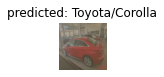

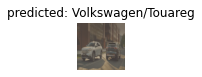

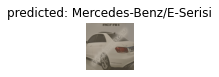

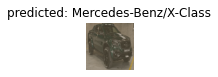

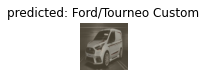

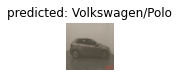

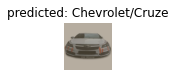

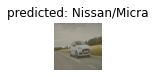

In [27]:
visualize_model(model_ft)

In [57]:
'''torch.save(model_ft,"dod-image30.pt")'''

In [58]:
'''model2 = torch.load('dod-image30.pt')'''

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [59]:
transform_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

In [167]:
def predictR(PATH):
    img = Image.open(PATH).convert('RGB')
    img_preprocessed = transform_test(img).to(device)
    img_preprocessed= torch.unsqueeze(img_preprocessed, 0)
    model.eval()
    out = model(img_preprocessed).to(device)
    _, index = torch.max(out, 1)
    print(f'predicted: {Labels2.get(index.item())}')
    plt.imshow(img)
    return

predicted: Volkswagen/Polo


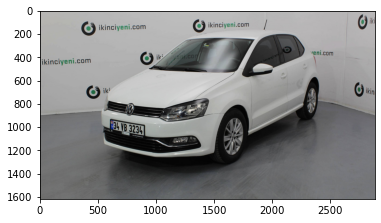

In [173]:
predictR("polo.jpg")